# Data Preparation

Modify the data so ML algorithms can properly learn from it.

### 1 Imports


In [43]:
# Import necessary libraries, functions, objects...
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Scikit-learn imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

### 2 Load dataset

In [44]:
# =============================================================================
# LOAD DATASET
# =============================================================================

# MODIFICARE IL PERCORSO DEL FILE CSV
df = pd.read_csv('../house_pricing.csv', sep=',')
# =============================================================================
# DESCRIBE THE DATA
# =============================================================================
# Perform a first, basic, inspection of the data: dimensions, first rows, column types, etc.


In [45]:
# Visualizza prime righe
df.head()

,Split,Id,MSZoning,LotArea,Street,Utilities,LandSlope,HouseStyle,YearBuilt,YearRemodAdd,...,GarageFinish,GarageCars,GarageArea,PavedDrive,OpenPorchSF,EnclosedPorch,PoolArea,MiscFeature,SalePrice,Electtrical
0,labeled,1,RL,6173,Pave,AllPub,Gtl,1Story,1967.0,1967,...,Unf,1,288,Y,0,0,0,NaN,125500.0,NaN
1,labeled,2,RL,11200,Pave,AllPub,Gtl,1Story,1985.0,1985,...,Unf,2,403,Y,26,0,0,NaN,180000.0,NaN
2,labeled,3,RL,11924,Pave,AllPub,Gtl,2Story,2005.0,2006,...,Fin,3,736,Y,21,0,0,NaN,345000.0,NaN
3,labeled,4,RM,6882,Pave,AllPub,Gtl,2Story,1914.0,2006,...,NaN,0,0,Y,0,115,0,NaN,127000.0,NaN
4,labeled,5,RL,4280,Pave,AllPub,Gtl,1Story,1913.0,2002,...,Unf,1,352,P,0,34,0,NaN,90350.0,NaN


In [46]:
# Controlla dimensioni dataset
print(f"Shape: {df.shape}")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

Shape: (992, 37)
Rows: 992, Columns: 37


### 3 Select Data

After the previous exploration you may decide to use or not use some of the data sets.

In [47]:
# TODO: Specifica le colonne da eliminare (ID, Split, colonne non utili)
# Esempio: colonne come 'Id', 'Split' vanno eliminate perché non sono features

columns_to_drop = ['Id', 'Split']  # MODIFICA QUESTA LISTA

# Elimina le colonne specificate
df.drop(columns=columns_to_drop, inplace=True)

print(f"Colonne rimanenti: {df.shape[1]}")
print(df.columns.tolist())

Colonne rimanenti: 35
['MSZoning', 'LotArea', 'Street', 'Utilities', 'LandSlope', 'HouseStyle', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'Foundation', 'TotalBsmtSF', 'Heating', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'PavedDrive', 'OpenPorchSF', 'EnclosedPorch', 'PoolArea', 'MiscFeature', 'SalePrice', 'Electtrical']


### 4 Clean Data

#### 4.1 Remove unnecessary features (if any)

In [48]:
# Visualizza tutte le colonne disponibili
print("Colonne nel dataset:")
print(df.columns.tolist())
print(f"\nNumero totale colonne: {len(df.columns)}")

Colonne nel dataset:
['MSZoning', 'LotArea', 'Street', 'Utilities', 'LandSlope', 'HouseStyle', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'Foundation', 'TotalBsmtSF', 'Heating', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'PavedDrive', 'OpenPorchSF', 'EnclosedPorch', 'PoolArea', 'MiscFeature', 'SalePrice', 'Electtrical']

Numero totale colonne: 35


In [49]:
# TODO: Specifica quali colonne eliminare
# Esempi comuni:
# - 'Id', 'Split' → non sono features
# - Colonne duplicate o ridondanti
# - Features con troppi missing values
# - Features non rilevanti per il problema

# MODIFICA QUESTA LISTA in base al tuo dataset
columns_to_drop = ['Id', 'Split']  

# Verifica che le colonne esistano prima di eliminarle
existing_cols_to_drop = [col for col in columns_to_drop if col in df.columns]
missing_cols = [col for col in columns_to_drop if col not in df.columns]

if missing_cols:
    print(f"⚠️ ATTENZIONE: Colonne non trovate nel dataset: {missing_cols}")

if existing_cols_to_drop:
    print(f"Colonne da eliminare: {existing_cols_to_drop}")
    df.drop(columns=existing_cols_to_drop, inplace=True)
    print(f"✓ Colonne eliminate con successo!")
else:
    print("ℹ️ Nessuna colonna da eliminare")

⚠️ ATTENZIONE: Colonne non trovate nel dataset: ['Id', 'Split']
ℹ️ Nessuna colonna da eliminare


#### 4.2 Deal with erroneous values (if any)

Replace incorrect or placeholder values with appropriate ones.
 SOSTITUIRE VALORI ERRONEI

In [50]:
# Verifica la presenza di valori erronei comuni
print("="*60)
print("RICERCA VALORI ERRONEI")
print("="*60)

# Valori da cercare: ?, unknown, NA, N/A, --, etc.
erroneous_values = ['?', '??', 'NA', 'N/A', '--', '']

# Controlla ogni colonna object (categorica)
categorical_cols = df.select_dtypes(include=['object']).columns

print(f"\nColonne categoriche da controllare: {len(categorical_cols)}")

for col in categorical_cols:
    unique_vals = df[col].unique()
    found_erroneous = [val for val in erroneous_values if val in unique_vals]
    
    if found_erroneous:
        count = sum(df[col].isin(found_erroneous))
        print(f"\n⚠️ {col}:")
        print(f"   Valori erronei trovati: {found_erroneous}")
        print(f"   Numero occorrenze: {count}")
        print(f"   Valori unici totali: {df[col].value_counts()}")

RICERCA VALORI ERRONEI

Colonne categoriche da controllare: 14


In [51]:
# TODO: Sostituisci i valori erronei con valori corretti
# Esempio per dataset BANK: df['job'] = df['job'].replace('?', 'unknown')
# Esempio per dataset HOUSE: non serve (nessun valore erroneo)

# MODIFICA QUESTO DIZIONARIO in base ai valori erronei trovati
replacements = {
    # 'nome_colonna': {'valore_erroneo': 'valore_corretto'}
    # Esempio:
    # 'job': {'?': 'unknown'},
    # 'education': {'?': 'unknown'},
}

# Applica le sostituzioni
if replacements:
    print("="*60)
    print("SOSTITUZIONE VALORI ERRONEI")
    print("="*60)
    
    for col, mapping in replacements.items():
        if col in df.columns:
            before_count = df[col].value_counts()
            df[col] = df[col].replace(mapping)
            after_count = df[col].value_counts()
            
            print(f"\n✓ {col}:")
            print(f"  Sostituzioni effettuate: {mapping}")
            print(f"  Prima: {before_count.to_dict()}")
            print(f"  Dopo: {after_count.to_dict()}")
        else:
            print(f"\n⚠️ Colonna '{col}' non trovata nel dataset")
else:
    print("\nℹ️ Nessuna sostituzione da effettuare (modifica il dizionario 'replacements' se necessario)")


ℹ️ Nessuna sostituzione da effettuare (modifica il dizionario 'replacements' se necessario)


#### 4.3 Deal with null or erroneous values (if any)

Handle missing values (NaN) by filling them with appropriate values.

In [52]:
# Verifica la presenza di valori mancanti
print("="*60)
print("ANALISI VALORI MANCANTI (NaN)")
print("="*60)

print("\nValori NaN per colonna:")
nan_counts = df.isna().sum()
nan_counts_filtered = nan_counts[nan_counts > 0].sort_values(ascending=False)

if len(nan_counts_filtered) > 0:
    print(nan_counts_filtered)
    print(f"\n⚠️ Totale NaN nel dataset: {df.isna().sum().sum()}")
    print(f"⚠️ Colonne con NaN: {len(nan_counts_filtered)}")
else:
    print("✓ Nessun valore NaN trovato!")

ANALISI VALORI MANCANTI (NaN)

Valori NaN per colonna:
Electtrical     992
MiscFeature     952
SalePrice       198
GarageType       54
GarageYrBlt      54
GarageFinish     54
Electrical       31
dtype: int64

⚠️ Totale NaN nel dataset: 2335
⚠️ Colonne con NaN: 7


In [53]:
# Visualizza dettagli colonne con NaN
if len(nan_counts_filtered) > 0:
    print("\n" + "="*60)
    print("DETTAGLIO COLONNE CON NaN")
    print("="*60)
    
    for col in nan_counts_filtered.index:
        total = len(df)
        nan_count = nan_counts_filtered[col]
        percentage = (nan_count / total) * 100
        dtype = df[col].dtype
        
        print(f"\n{col}:")
        print(f"  - NaN: {nan_count}/{total} ({percentage:.1f}%)")
        print(f"  - Tipo: {dtype}")
        
        # Se numerica, mostra statistiche
        if df[col].dtype in ['int64', 'float64']:
            print(f"  - Media: {df[col].mean():.2f}")
            print(f"  - Mediana: {df[col].median():.2f}")
        # Se categorica, mostra moda
        else:
            if not df[col].mode().empty:
                print(f"  - Moda: {df[col].mode()[0]}")
            print(f"  - Valori unici: {df[col].nunique()}")


DETTAGLIO COLONNE CON NaN

Electtrical:
  - NaN: 992/992 (100.0%)
  - Tipo: float64
  - Media: nan
  - Mediana: nan

MiscFeature:
  - NaN: 952/992 (96.0%)
  - Tipo: object
  - Moda: Shed
  - Valori unici: 3

SalePrice:
  - NaN: 198/992 (20.0%)
  - Tipo: float64
  - Media: 163494.86
  - Mediana: 152000.00

GarageType:
  - NaN: 54/992 (5.4%)
  - Tipo: object
  - Moda: Attchd
  - Valori unici: 6

GarageYrBlt:
  - NaN: 54/992 (5.4%)
  - Tipo: float64
  - Media: 1977.77
  - Mediana: 1978.00

GarageFinish:
  - NaN: 54/992 (5.4%)
  - Tipo: object
  - Moda: Unf
  - Valori unici: 3

Electrical:
  - NaN: 31/992 (3.1%)
  - Tipo: object
  - Moda: SBrkr
  - Valori unici: 4


C:\Users\giaco\AppData\Roaming\Python\Python313\site-packages\numpy\lib\_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


**Strategia di imputazione**

**Per NUMERICHE:**
- Media: quando distribuzione normale
- Mediana: quando ci sono outliers
- 0: quando NaN significa "assenza" (es. GarageYrBlt → 0 se no garage)

**Per CATEGORICHE:**
- Moda: valore più frequente
- Valore specifico: es. "NoGarage", "Unknown"

In [54]:
# TODO: Definisci come gestire i valori NaN
# Crea un dizionario: {nome_colonna: valore_sostitutivo}

# MODIFICA QUESTO DIZIONARIO in base al tuo dataset
na_subs = {
    # Esempio HOUSE PRICING:
     'Electrical': 'SBrkr',           # categorica → moda
     'GarageType': 'NoGarage',        # categorica → valore specifico
     'GarageFinish': 'NoGarage',      # categorica → valore specifico
    'GarageYrBlt': 0,                # numerica → 0 (no garage)
    
    # Esempio BANK:
    # Di solito non ha NaN, ma se li hai:
    # 'age': df['age'].median(),       # numerica → mediana
    # 'balance': df['balance'].mean(), # numerica → media
}

print("="*60)
print("IMPUTAZIONE VALORI MANCANTI")
print("="*60)

if na_subs:
    print("\nSostituzioni da applicare:")
    for col, value in na_subs.items():
        if col in df.columns:
            nan_before = df[col].isna().sum()
            print(f"  {col}: {nan_before} NaN → {value}")
        else:
            print(f"  ⚠️ {col}: colonna non trovata!")
    
    # Applica le sostituzioni
    df.fillna(na_subs, inplace=True)
    print("\n✓ Sostituzioni applicate!")
else:
    print("\nℹ️ Nessuna sostituzione definita")
    print("   Modifica il dizionario 'na_subs' se necessario")

IMPUTAZIONE VALORI MANCANTI

Sostituzioni da applicare:
  Electrical: 31 NaN → SBrkr
  GarageType: 54 NaN → NoGarage
  GarageFinish: 54 NaN → NoGarage
  GarageYrBlt: 54 NaN → 0

✓ Sostituzioni applicate!


In [55]:
# Verifica che non ci siano più NaN (o mostra quelli rimanenti)
print("\n" + "="*60)
print("VERIFICA POST-IMPUTAZIONE")
print("="*60)

print("\nValori NaN rimanenti:")
remaining_nan = df.isna().sum()
remaining_nan_filtered = remaining_nan[remaining_nan > 0].sort_values(ascending=False)

if len(remaining_nan_filtered) > 0:
    print(remaining_nan_filtered)
    print(f"\n⚠️ Ancora {df.isna().sum().sum()} NaN nel dataset")
    print("⚠️ Potrebbero servire ulteriori imputazioni o sono NaN intenzionali")
else:
    print("✓ Nessun NaN rimanente!")
    print("✓ Dataset completamente pulito")


VERIFICA POST-IMPUTAZIONE

Valori NaN rimanenti:
Electtrical    992
MiscFeature    952
SalePrice      198
dtype: int64

⚠️ Ancora 2142 NaN nel dataset
⚠️ Potrebbero servire ulteriori imputazioni o sono NaN intenzionali


In [56]:
# Verifica dimensioni finali
print("\n" + "="*60)
print("RIEPILOGO FINALE")
print("="*60)
print(f"Shape: {df.shape}")
print(f"Righe: {df.shape[0]}")
print(f"Colonne: {df.shape[1]}")
print(f"Totale NaN: {df.isna().sum().sum()}")


RIEPILOGO FINALE
Shape: (992, 35)
Righe: 992
Colonne: 35
Totale NaN: 2142


#### 4.4 Handle intentional NaN

Some columns may have NaN values that should remain (e.g., target variable in test set) or need special treatment.

In [57]:
# ============================================================
# GESTIONE NaN INTENZIONALI
# ============================================================

print("="*60)
print("NaN INTENZIONALI - ANALISI")
print("="*60)

remaining_nan = df.isna().sum()
remaining_nan_filtered = remaining_nan[remaining_nan > 0].sort_values(ascending=False)

if len(remaining_nan_filtered) > 0:
    print("\nColonne con NaN rimanenti:")
    for col, count in remaining_nan_filtered.items():
        percentage = (count / len(df)) * 100
        print(f"  {col:20s}: {count:5d} ({percentage:5.1f}%)")
    
    # Analizza se sono NaN intenzionali
    print("\n" + "-"*60)
    print("INTERPRETAZIONE:")
    print("-"*60)
    
    # Controlla se è il target
    # TODO: MODIFICA 'SalePrice' con il nome del tuo target
    target_col = 'SalePrice'  # Per Bank usa 'y'
    
    if target_col in remaining_nan_filtered.index:
        print(f"\n✓ {target_col}: {remaining_nan_filtered[target_col]} NaN")
        print(f"  → Normale! Sono i dati del test/leaderboard set")
        print(f"  → NON imputare questi NaN")
    
    # Altre colonne con NaN
    other_cols = [col for col in remaining_nan_filtered.index if col != target_col]
    
    if other_cols:
        print(f"\n⚠️ Altre colonne con NaN:")
        for col in other_cols:
            print(f"  - {col}: {remaining_nan_filtered[col]} NaN")
        
        print(f"\n⚠️ AZIONE NECESSARIA:")
        print(f"  1. Se NaN significa 'assenza' → CREA FEATURE BINARIA")
        print(f"  2. Se NaN è errore → IMPUTA nella cella precedente")
        print(f"  3. Se NaN è intenzionale → LASCIA COSÌ")
else:
    print("\n✓ Nessun NaN rimanente (escludendo il target)!")

NaN INTENZIONALI - ANALISI

Colonne con NaN rimanenti:
  Electtrical         :   992 (100.0%)
  MiscFeature         :   952 ( 96.0%)
  SalePrice           :   198 ( 20.0%)

------------------------------------------------------------
INTERPRETAZIONE:
------------------------------------------------------------

✓ SalePrice: 198 NaN
  → Normale! Sono i dati del test/leaderboard set
  → NON imputare questi NaN

⚠️ Altre colonne con NaN:
  - Electtrical: 992 NaN
  - MiscFeature: 952 NaN

⚠️ AZIONE NECESSARIA:
  1. Se NaN significa 'assenza' → CREA FEATURE BINARIA
  2. Se NaN è errore → IMPUTA nella cella precedente
  3. Se NaN è intenzionale → LASCIA COSÌ


In [58]:
# TODO: Se alcune colonne hanno NaN che significano "assenza",
# crea feature binarie PRIMA di imputare

# Esempio HOUSE PRICING:
# MiscFeature ha NaN → significa "nessuna misc feature"
# Soluzione: crea HasMiscFeature PRIMA di droppare MiscFeature

# MODIFICA in base al tuo dataset
if 'MiscFeature' in df.columns:
    # Crea feature binaria: 1 se ha misc feature, 0 se NaN
    df['HasMiscFeature'] = (~df['MiscFeature'].isna()).astype(int)
    print("✓ Creata feature 'HasMiscFeature'")
    print(f"  0 (no misc): {(df['HasMiscFeature'] == 0).sum()}")
    print(f"  1 (has misc): {(df['HasMiscFeature'] == 1).sum()}")
    
    # Ora puoi droppare la colonna originale (o gestirla dopo in Construct Data)
    # df.drop(columns=['MiscFeature'], inplace=True)

✓ Creata feature 'HasMiscFeature'
  0 (no misc): 952
  1 (has misc): 40


In [59]:
# VERIFICA FINALE POST-GESTIONE NaN INTENZIONALI
print("\n" + "="*60)
print("VERIFICA FINALE NaN")
print("="*60)

# TODO: MODIFICA con il nome del tuo target
target_col = 'SalePrice'  # Per Bank usa 'y'

# Conta NaN escludendo il target
if target_col in df.columns:
    nan_without_target = df.drop(columns=[target_col]).isna().sum().sum()
    nan_in_target = df[target_col].isna().sum()
    
    print(f"\nNaN nel target ({target_col}): {nan_in_target} ✓ (test set)")
    print(f"NaN nelle features: {nan_without_target}")
    
    if nan_without_target > 0:
        print("\n⚠️ Potrebbero servire ulteriori imputazioni!")
        print("   Controlla la cella precedente")
    else:
        print("\n✓ Tutte le features sono complete!")
        print("✓ Pronto per Construct Data!")
else:
    print(f"⚠️ Target '{target_col}' non trovato, controlla il nome")


VERIFICA FINALE NaN

NaN nel target (SalePrice): 198 ✓ (test set)
NaN nelle features: 1944

⚠️ Potrebbero servire ulteriori imputazioni!
   Controlla la cella precedente


### 6 Costruct Data

#### 6.1: BINARY FEATURES

In [60]:
# =============================================================================
# CONSTRUCT DATA - BINARY FEATURES
# =============================================================================

# TODO: MODIFICA QUESTA CONFIGURAZIONE
BINARY_CONFIG = {
    'MiscFeature': 'HasMiscFeature',      # Cambia con le tue colonne
    'GarageFinish': 'HasGarage',          # Aggiungi altre se servono
}

# Crea le binary features
for col_original, col_new in BINARY_CONFIG.items():
    if col_original in df.columns:
        # 1 se ha valore, 0 se NaN
        df[col_new] = (~df[col_original].isna()).astype(int)
        
        # Stats
        has = (df[col_new] == 1).sum()
        no = (df[col_new] == 0).sum()
        print(f"✓ {col_original:20s} → {col_new:20s}")
        print(f"  Has (1): {has:4d} ({has/len(df)*100:5.1f}%)")
        print(f"  No  (0): {no:4d} ({no/len(df)*100:5.1f}%)\n")

print(f"✓ Created {len(BINARY_CONFIG)} binary features")
print(f"New shape: {df.shape}")

✓ MiscFeature          → HasMiscFeature      
  Has (1):   40 (  4.0%)
  No  (0):  952 ( 96.0%)

✓ GarageFinish         → HasGarage           
  Has (1):  992 (100.0%)
  No  (0):    0 (  0.0%)

✓ Created 2 binary features
New shape: (992, 37)


#### 6.2: Feature Aggregate

In [61]:
# =============================================================================
# CONSTRUCT DATA - FEATURE AGGREGATE
# =============================================================================
# Somma di più colonne correlate

# TODO: MODIFICA CON LE TUE COLONNE
# Esempio House Pricing: somma tutte le aree porch
df['TotalPorchSF'] = df['OpenPorchSF'] + df['EnclosedPorch']

# Esempio House Pricing: area totale costruita
df['TotalBuiltArea'] = df['1stFlrSF'] + df['2ndFlrSF'] + df['TotalBsmtSF']

print("✓ Feature aggregate create")

✓ Feature aggregate create


#### 6.3: Ratios / Percentuali

In [62]:
# =============================================================================
# CONSTRUCT DATA - RATIOS / PERCENTUALI
# =============================================================================
# Divisioni per creare proporzioni

# TODO: MODIFICA CON LE TUE COLONNE
# Esempio House Pricing: % area living sul totale lotto
df['LivingAreaPerc'] = df['GrLivArea'] / df['LotArea']

# Esempio House Pricing: rapporto built area / living area
df['BuiltAreaRatio'] = df['TotalBuiltArea'] / df['GrLivArea']

# Esempio Bank: rapporto balance/age
# df['balance_per_age'] = df['balance'] / df['age']

print("✓ Ratios create")

✓ Ratios create


#### 6.4: Boolean da Condizioni

In [63]:
# =============================================================================
# CONSTRUCT DATA - BOOLEAN DA CONDIZIONI
# =============================================================================
# 1 se condizione vera, 0 altrimenti

# TODO: MODIFICA CON LE TUE CONDIZIONI
# Esempio House Pricing: è stato ristrutturato?
df['WasRemod'] = (df['YearBuilt'] != df['YearRemodAdd']).astype(int)

# Esempio House Pricing: ha second floor?
df['Has2ndFloor'] = (df['2ndFlrSF'] > 0).astype(int)

# Esempio Bank: ha balance negativo?
# df['has_negative_balance'] = (df['balance'] < 0).astype(int)

print("✓ Boolean features create")

✓ Boolean features create


#### 6.5: Binning → Categorie

In [64]:
# =============================================================================
# CONSTRUCT DATA - BINNING
# =============================================================================
# Converti variabile continua in categorie

# YearBuilt in epoche
df['house_age_group'] = pd.cut(df['YearBuilt'], 
                               bins=[0, 1950, 1980, 2000, 2020], 
                               labels=[0, 1, 2, 3])  # 0=very old, 1=old, 2=recent, 3=new

# LotArea in categorie
df['lot_size_category'] = pd.cut(df['LotArea'], 
                                 bins=[0, 5000, 10000, 15000, float('inf')], 
                                 labels=[0, 1, 2, 3])  # 0=small, 1=medium, 2=large, 3=very large

print("✓ Binning completato")

✓ Binning completato


#### 6.6: Feature Composite

In [65]:
# =============================================================================
# CONSTRUCT DATA - FEATURE COMPOSITE
# =============================================================================
# Combinazione di più feature

# Quality score della casa
df['house_quality_score'] = (
    (df['YearBuilt'] > 1990).astype(int) +      # casa recente
    (df['GarageCars'] >= 2).astype(int) +       # garage grande
    (df['FullBath'] >= 2).astype(int) +         # bagni multipli
    (df['Fireplaces'] > 0).astype(int)          # ha camino
)  # Score da 0 a 4

print("✓ Feature composite create")

✓ Feature composite create


#### 6.7: Feature Temporali / Stagionali

In [66]:
# =============================================================================
# CONSTRUCT DATA - FEATURE TEMPORALI
# =============================================================================

# Età della casa
current_year = 2024
df['house_age'] = current_year - df['YearBuilt']

# Anni dall'ultimo remodel
df['years_since_remod'] = current_year - df['YearRemodAdd']

# Età del garage (gestisce NaN)
df['garage_age'] = current_year - df['GarageYrBlt']
df['garage_age'] = df['garage_age'].fillna(0)  # 0 se no garage

print("✓ Feature temporali create")

✓ Feature temporali create


#### 6.8 VERIFICA FINALE (opzionale)

In [67]:
# =============================================================================
# VERIFICA TUTTE LE NUOVE FEATURE
# =============================================================================

print("\n" + "="*60)
print("NUOVE FEATURE CREATE:")
print("="*60)

# Lista delle feature create (AGGIORNA CON I TUOI NOMI)
new_features = [
    'TotalPorchSF', 'TotalBuiltArea',           # Aggregate
    'LivingAreaPerc', 'BuiltAreaRatio',         # Ratios
    'WasRemod', 'Has2ndFloor',                  # Boolean
    'age_group', 'balance_category',            # Binning
    'economic_profile',                          # Composite
    'season', 'early_month', 'late_month'       # Temporali
]

# Mostra solo quelle che esistono
existing = [col for col in new_features if col in df.columns]
print(f"\nFeature esistenti: {len(existing)}")
for col in existing:
    print(f"  - {col}")

print(f"\nShape finale: {df.shape}")


NUOVE FEATURE CREATE:

Feature esistenti: 6
  - TotalPorchSF
  - TotalBuiltArea
  - LivingAreaPerc
  - BuiltAreaRatio
  - WasRemod
  - Has2ndFloor

Shape finale: (992, 49)


### 7 Feature Engineering

#### 7.1: Identificare Colonne Object

In [68]:
# =============================================================================
# FEATURE ENGINEERING - ENCODING
# =============================================================================

print("="*60)
print("FEATURE ENGINEERING - ENCODING")
print("="*60)

# Identifica colonne categoriche (object/string)
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print(f"\nColonne categoriche trovate: {len(categorical_cols)}")
for col in categorical_cols:
    n_unique = df[col].nunique()
    print(f"  - {col:20s}: {n_unique} categorie")

FEATURE ENGINEERING - ENCODING

Colonne categoriche trovate: 14
  - MSZoning            : 5 categorie
  - Street              : 2 categorie
  - Utilities           : 2 categorie
  - LandSlope           : 3 categorie
  - HouseStyle          : 8 categorie
  - RoofStyle           : 5 categorie
  - Foundation          : 5 categorie
  - Heating             : 5 categorie
  - CentralAir          : 2 categorie
  - Electrical          : 4 categorie
  - GarageType          : 7 categorie
  - GarageFinish        : 4 categorie
  - PavedDrive          : 3 categorie
  - MiscFeature         : 3 categorie


#### 7.2: Mini-Study per Ordinale (opzionale)

In [69]:
# =============================================================================
# MINI-STUDY PER ENCODING ORDINALE
# =============================================================================
# Usa un campione per decidere l'ordine senza fare leakage

# Esempio: MSZoning ordinato per prezzo medio
sample = df[df['SalePrice'].notna()].sample(frac=0.3, random_state=42)
price_by_zone = sample.groupby('MSZoning')['SalePrice'].mean().sort_values()

print("\nMSZoning ordinato per prezzo (campione 30%):")
print(price_by_zone)

# Usa questo per decidere l'ordine del mapping


MSZoning ordinato per prezzo (campione 30%):
MSZoning
RH    111250.000000
RM    117895.238095
RL    180398.248619
FV    213597.727273
Name: SalePrice, dtype: float64


#### 7.3: Ordinal Encoding Manuale

In [70]:
# =============================================================================
# ORDINAL ENCODING MANUALE
# =============================================================================
# Per variabili con ordine naturale

# TODO: MODIFICA CON LE TUE COLONNE E ORDINI

# Esempio House: LandSlope (ordine: gentle < moderate < severe)
landslope_map = {'Gtl': 0, 'Mod': 1, 'Sev': 2}
df['LandSlope_ord'] = df['LandSlope'].map(landslope_map)

# Esempio House: MSZoning (ordine basato su mini-study sopra)
mszoning_map = {'C (all)': 0, 'RM': 1, 'RH': 2, 'RL': 3, 'FV': 4}
df['MSZoning_ord'] = df['MSZoning'].map(mszoning_map)

print("✓ Ordinal encoding completato")
print(f"  - LandSlope → LandSlope_ord")
print(f"  - MSZoning → MSZoning_ord")

✓ Ordinal encoding completato
  - LandSlope → LandSlope_ord
  - MSZoning → MSZoning_ord


#### 7.4: One-Hot Encoding

In [ ]:
# =============================================================================
# ONE-HOT ENCODING
# =============================================================================
# Per variabili categoriche nominali (senza ordine)

# TODO: MODIFICA CON LE TUE COLONNE

# Colonne da encodare con one-hot (max 5-6 categorie)
cols_to_onehot = ['HouseStyle', 'RoofStyle', 'Foundation']

for col in cols_to_onehot:
    if col in df.columns:
        # Crea dummies (drop_first=True per evitare multicollinearità)
        dummies = pd.get_dummies(df[col], prefix=col, drop_first=True, dtype=int)
        df = pd.concat([df, dummies], axis=1)
        print(f"✓ One-hot: {col} → {len(dummies.columns)} dummies") 

print(f"\n✓ One-hot encoding completato") #Significa che ha creato le colonne dummy per ogni categoria.

✓ One-hot: HouseStyle → 7 dummies
✓ One-hot: RoofStyle → 4 dummies
✓ One-hot: Foundation → 4 dummies

✓ One-hot encoding completato


#### 7.5: Binary Encoding (yes/no → 0/1)

In [72]:
# =============================================================================
# BINARY ENCODING (YES/NO → 0/1)
# =============================================================================

# TODO: MODIFICA CON LE TUE COLONNE

# Colonne con valori yes/no o simili
binary_cols = ['CentralAir', 'PavedDrive']  # Aggiungi le tue

for col in binary_cols:
    if col in df.columns:
        # Y/N → 1/0
        df[col] = (df[col] == 'Y').astype(int)
        print(f"✓ Binary encoding: {col} (Y=1, N=0)")

print(f"\n✓ Binary encoding completato")

✓ Binary encoding: CentralAir (Y=1, N=0)
✓ Binary encoding: PavedDrive (Y=1, N=0)

✓ Binary encoding completato


#### 7.6: Label Encoding (per high cardinality)

In [73]:
# =============================================================================
# LABEL ENCODING
# =============================================================================
# Per categoriche con tante categorie (non one-hot)

from sklearn.preprocessing import LabelEncoder

# TODO: MODIFICA CON LE TUE COLONNE
# Colonne con tante categorie (>6)
cols_to_label = ['Street', 'Utilities']  # Esempio

le = LabelEncoder()

for col in cols_to_label:
    if col in df.columns:
        df[f'{col}_encoded'] = le.fit_transform(df[col].astype(str))
        print(f"✓ Label encoding: {col} → {col}_encoded")

print(f"\n✓ Label encoding completato")

✓ Label encoding: Street → Street_encoded
✓ Label encoding: Utilities → Utilities_encoded

✓ Label encoding completato


#### 7.7 Target Encoding (SOLO CLASSIFICAZIONE)

In [74]:
# =============================================================================
# TARGET ENCODING (SOLO PER CLASSIFICAZIONE)
# =============================================================================
# ATTENZIONE: Fare DOPO train/test split per evitare leakage!

# Esempio Bank Marketing (se avessi 'job' e target 'y')
# target_col = 'y'
# cat_col = 'job'

# # Calcola media target per categoria (SOLO su train set!)
# target_means = df_train.groupby(cat_col)[target_col].mean()

# # Applica a train e test
# df_train[f'{cat_col}_target_enc'] = df_train[cat_col].map(target_means)
# df_test[f'{cat_col}_target_enc'] = df_test[cat_col].map(target_means)

# print(f"✓ Target encoding: {cat_col}")

print("⚠️  Target encoding va fatto DOPO train/test split!")

⚠️  Target encoding va fatto DOPO train/test split!


#### 7.8: Drop Colonne Originali

In [75]:
# =============================================================================
# DROP COLONNE CATEGORICHE ORIGINALI
# =============================================================================
# Dopo encoding, rimuovi le colonne originali

# TODO: MODIFICA CON LE COLONNE CHE HAI ENCODATO

cols_to_drop = [
    'LandSlope', 'MSZoning',           # Ordinal (hai _ord)
    'HouseStyle', 'RoofStyle',         # One-hot (hai dummies)
    'CentralAir', 'PavedDrive',        # Binary (già convertite)
    'Street', 'Utilities',             # Label (hai _encoded)
]

# Rimuovi solo quelle che esistono
cols_existing = [col for col in cols_to_drop if col in df.columns]

if cols_existing:
    df.drop(columns=cols_existing, inplace=True)
    print(f"\n✓ Rimosse {len(cols_existing)} colonne categoriche originali")
    print(f"  Shape: {df.shape}")


✓ Rimosse 8 colonne categoriche originali
  Shape: (992, 60)


#### 7.9 ORDINAL ENCODING: 

In [81]:
# Controlla i valori unici per ogni colonna
print(df['Foundation'].unique())
print(df['Heating'].unique())
print(df['Electrical'].unique())
print(df['GarageType'].unique())
print(df['GarageFinish'].unique())
print(df['MiscFeature'].unique())

['CBlock' 'PConc' 'BrkTil' 'Slab' 'Stone']
['GasA' 'Wall' 'GasW' 'Grav' 'Floor']
['SBrkr' 'FuseA' 'FuseF' 'FuseP']
['Attchd' 'BuiltIn' 'NoGarage' 'Detchd' 'Basment' '2Types' 'CarPort']
['Unf' 'Fin' 'NoGarage' 'RFn']
[nan 'Shed' 'Othr' 'TenC']


In [82]:
# =============================================================================
# ORDINAL ENCODING MANUALE
# =============================================================================

# Foundation (ordine qualità/stabilità)
foundation_map = {'Slab': 0, 'BrkTil': 1, 'CBlock': 2, 'Stone': 3, 'PConc': 4}
df['Foundation_ord'] = df['Foundation'].map(foundation_map)

# Heating (ordine qualità/modernità)
heating_map = {'Floor': 0, 'Grav': 1, 'Wall': 2, 'GasW': 3, 'GasA': 4}
df['Heating_ord'] = df['Heating'].map(heating_map)

# Electrical (ordine qualità)
electrical_map = {'FuseP': 0, 'FuseF': 1, 'FuseA': 2, 'SBrkr': 3}
df['Electrical_ord'] = df['Electrical'].map(electrical_map)

# GarageType (ordine qualità/protezione)
garagetype_map = {'NoGarage': 0, 'CarPort': 1, 'Detchd': 2, 'Basment': 3, 'BuiltIn': 4, 'Attchd': 5, '2Types': 6}
df['GarageType_ord'] = df['GarageType'].map(garagetype_map)

# GarageFinish (ordine finitura)
garagefinish_map = {'NoGarage': 0, 'Unf': 1, 'RFn': 2, 'Fin': 3}
df['GarageFinish_ord'] = df['GarageFinish'].map(garagefinish_map)

# MiscFeature (ordine valore - NaN gestito come 0)
miscfeature_map = {'Shed': 1, 'Othr': 2, 'TenC': 3}
df['MiscFeature_ord'] = df['MiscFeature'].map(miscfeature_map).fillna(0)

print("✓ Ordinal encoding completato")
print(f"  - Foundation → Foundation_ord")
print(f"  - Heating → Heating_ord")
print(f"  - Electrical → Electrical_ord")
print(f"  - GarageType → GarageType_ord")
print(f"  - GarageFinish → GarageFinish_ord")
print(f"  - MiscFeature → MiscFeature_ord")

✓ Ordinal encoding completato
  - Foundation → Foundation_ord
  - Heating → Heating_ord
  - Electrical → Electrical_ord
  - GarageType → GarageType_ord
  - GarageFinish → GarageFinish_ord
  - MiscFeature → MiscFeature_ord


In [83]:
# =============================================================================
# DROP COLONNE ORDINALI ENCODATE
# =============================================================================

cols_to_drop = [
    'Foundation',
    'Heating', 
    'Electrical',
    'GarageType',
    'GarageFinish',
    'MiscFeature',
]

# Rimuovi solo quelle che esistono
cols_existing = [col for col in cols_to_drop if col in df.columns]

if cols_existing:
    df.drop(columns=cols_existing, inplace=True)
    print(f"✓ Rimosse {len(cols_existing)} colonne")
    print(f"  Shape: {df.shape}")

✓ Rimosse 6 colonne
  Shape: (992, 60)


#### Verifica Finale Tipi Dati

In [84]:
# =============================================================================
# VERIFICA FINALE - TUTTO NUMERICO
# =============================================================================

print("\n" + "="*60)
print("VERIFICA FINALE ENCODING")
print("="*60)

# Conta tipi di dati
print("\nTipi di dati:")
print(df.dtypes.value_counts())

# Verifica colonne object rimanenti
remaining_object = df.select_dtypes(include=['object']).columns.tolist()

if remaining_object:
    print(f"\n⚠️  Colonne object rimanenti: {len(remaining_object)}")
    for col in remaining_object:
        print(f"  - {col}: {df[col].nunique()} valori unici")
    print("\n⚠️  Queste colonne vanno ancora encodate!")
else:
    print("\n✓ Tutte le colonne sono numeriche!")
    print(f"✓ Shape finale: {df.shape}")


VERIFICA FINALE ENCODING

Tipi di dati:
int64       49
float64      9
category     2
Name: count, dtype: int64

✓ Tutte le colonne sono numeriche!
✓ Shape finale: (992, 60)


### 8 ELIMINARE SOLO UNA COLONNA

In [93]:
print(df["Electtrical"])
df["Electtrical"].value_counts()
df["Electtrical"].unique()



0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
987   NaN
988   NaN
989   NaN
990   NaN
991   NaN
Name: Electtrical, Length: 992, dtype: float64


array([nan])

In [94]:
df.drop(columns=['Electtrical'], inplace=True)


### 9 Correlation 

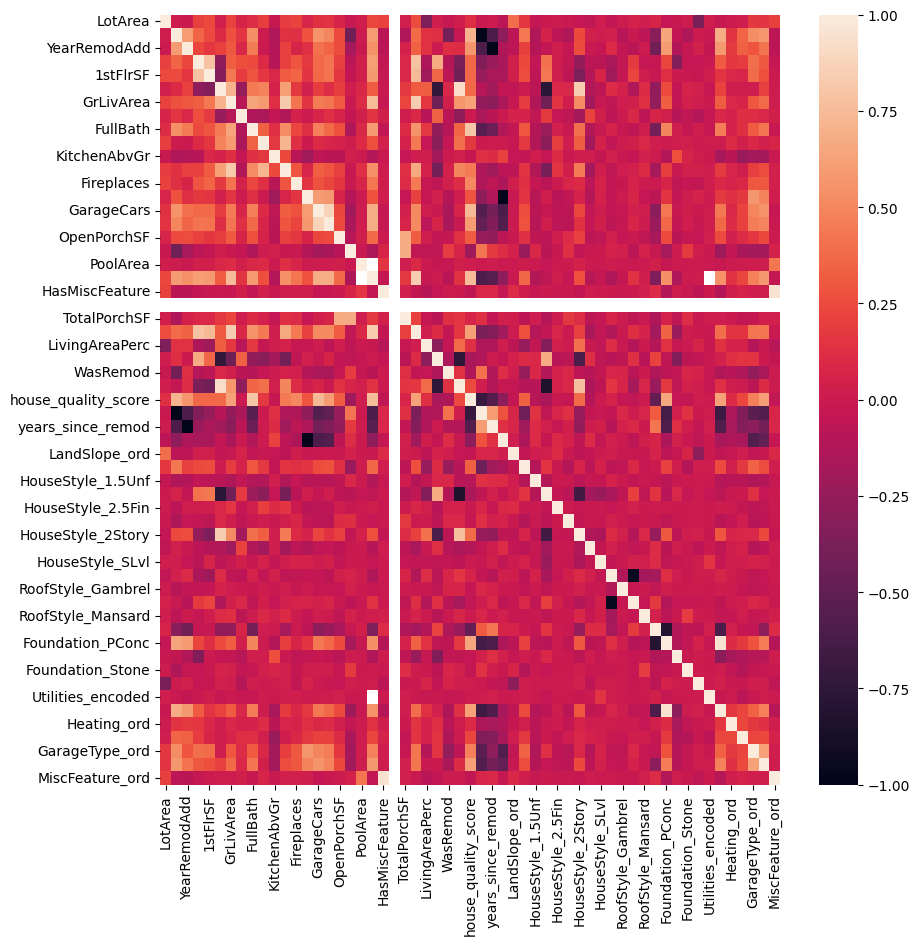

In [95]:
# =============================================================================
# HIGH CORRELATIONS
# =============================================================================
# Trova e rimuovi features altamente correlate

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np  

# Calcola matrice di correlazione
corrs = df.corr(numeric_only=True)

# Visualizza heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(corrs, vmin=-1, vmax=1)
plt.show()

In [88]:
# Trova top 20 correlazioni più alte
# (esclude diagonale e duplicati)
corrs.where(np.triu(np.ones(corrs.shape), k=1).astype(bool)).unstack().dropna().abs().sort_values(ascending=False).head(20)

house_age            YearBuilt            1.000000
garage_age           GarageYrBlt          1.000000
years_since_remod    YearRemodAdd         1.000000
RoofStyle_Hip        RoofStyle_Gable      0.953716
MiscFeature_ord      HasMiscFeature       0.950169
Foundation_ord       Foundation_PConc     0.947949
Has2ndFloor          2ndFlrSF             0.928104
GarageArea           GarageCars           0.872321
TotalBuiltArea       GrLivArea            0.840286
HouseStyle_1Story    Has2ndFloor          0.840096
HouseStyle_2Story    2ndFlrSF             0.839620
TotalBuiltArea       SalePrice            0.834080
TotRmsAbvGrd         GrLivArea            0.826289
Foundation_PConc     Foundation_CBlock    0.804806
house_quality_score  FullBath             0.798154
1stFlrSF             TotalBsmtSF          0.788664
TotalBuiltArea       TotalBsmtSF          0.782983
HouseStyle_1Story    2ndFlrSF             0.781134
HouseStyle_2Story    Has2ndFloor          0.772176
Has2ndFloor          BuiltAreaR

In [99]:

df["HasMiscFeature"].unique()

array([0, 1])

 TODO: ANALIZZA LE CORRELAZIONI ALTE
 Se trovi correlazioni > 0.9, decidi quale feature droppare

Esempio: se vedi GarageType_NoGarage correlato 0.99 con GarageYrBlt

df.drop(columns=['GarageType_NoGarage'], inplace=True)

 Esempio: puoi fare scatter plot per verificare

 df.plot.scatter(x='feature1', y='feature2')
 
plt.show()

<Axes: xlabel='MiscFeature_ord', ylabel='HasMiscFeature'>

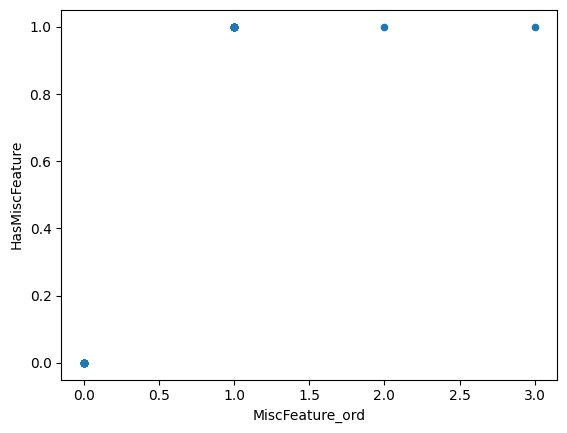

In [103]:
df.plot.scatter(x='MiscFeature_ord', y='HasMiscFeature')  

### 10 Save New Dataset

In [105]:
df.to_csv('Canovaccio_house_pricing.csv', index=False)
